In [1]:
from PIL import Image, ImageFilter
from scipy.ndimage.filters import convolve
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
from skimage.morphology import erosion, dilation
from scipy.ndimage import gaussian_filter
from skimage.filters import threshold_otsu
from skimage import measure, util

C:\Users\T R N V A N M A N H\AppData\Local\Temp\ipykernel_11988\32893984.py:2: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


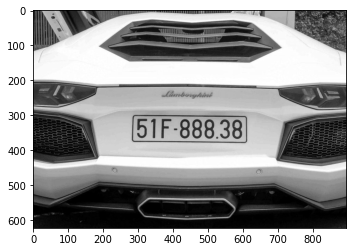

In [29]:
car_gray = np.asarray(Image.open('./car1.jpg').convert('L'))
plt.imshow(car_gray, cmap='gray')
plt.show()

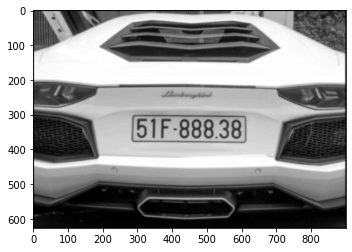

In [30]:
def gaussian_filter(size, nsig=1):
        x = np.linspace(-nsig, nsig, size+1)
        ker1d = np.diff(st.norm.cdf(x))
        ker2d = np.outer(ker1d, ker1d)
        return ker2d

def gaussian_blur(image, kernel_size=5):
#         try:
            blured_img = signal.convolve2d(image, gaussian_filter(kernel_size))
#             img = Image.fromarray(blured_img)
#             self.image_display(img)
#             print('LOG:. blured')
#             print('...', img.size)
#         except Exception as e:
#             print(e,'\nERROR: Gray scale first')
            return blured_img

car_blurred = gaussian_blur(car_gray, 5)
plt.imshow(car_blurred, cmap='gray')
plt.show()

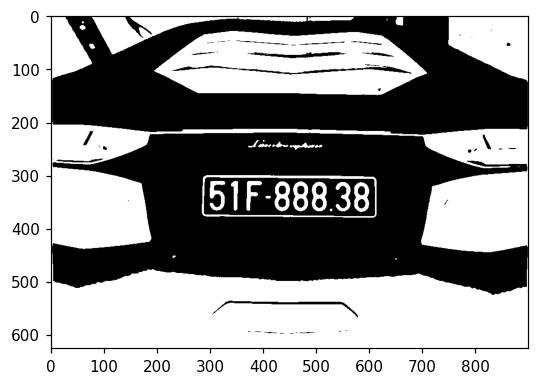

In [31]:
threshold_value = threshold_otsu(car_blurred)
car_binary = np.invert(car_blurred > threshold_value)
plt.figure(dpi=110)
plt.imshow(car_binary, cmap='gray')
plt.show()

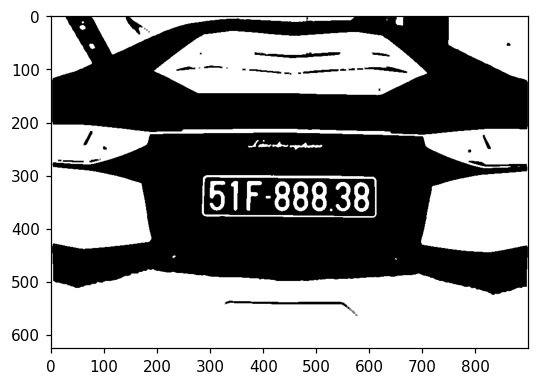

In [32]:
def _erosion(image, filter=[]):
    if not filter:
        erosion_filter = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    else:
        erosion_filter = np.array(filter)
    erosed = erosion(image, erosion_filter)
    return erosed

def _dilation(image, filter=[]):
    if not filter:
        dilation_filter = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    else:
        dilation_filter = np.array(filter)
    dilated = dilation(image, dilation_filter)
    return dilated

def eros_img(image):
#         try:
    erosed = _erosion(image)
    return erosed
#             self.image_display(erosed)
#             print('LOG:. Erosion')
#         except Exception as e:
#             print('ERROR:. ',e, '\n\t => Gray scale first')
        
def dilate_img(image):
#         try:
    dilated = self._dilation(image)
#             self.image_display(dilated)
#             print('LOG:. Dilation')
#         except Exception as e:
#             print('ERROR:. ',e, '\n\t => Gray scale first')
    return dilated

def _opening(image):
#         try:
    filter = [[1,0,1],[0,1,0],[1,0,1]]
    img = _erosion(image, filter)
    img = _dilation(img, filter)
#             self.image_display(img)
#             print('LOG:. Opening')
#         except Exception as e:
#             print("ERROR:. Turn image to Gray first!")
    return img

def _closing(image):
#         try:
    filter = [[1,0,1],[0,1,0],[1,0,1]]
    img=_dilation(image, filter)
    img=_erosion(img,filter)
#             self.image_display(img)
#             print('LOG:. Closing')
#         except Exception as e:
#             print("ERROR:. Turn image to Gray first!")
    return img

car_closed = _closing(car_binary)
plt.figure(dpi=110)
plt.imshow(car_closed, cmap='gray')
plt.show()

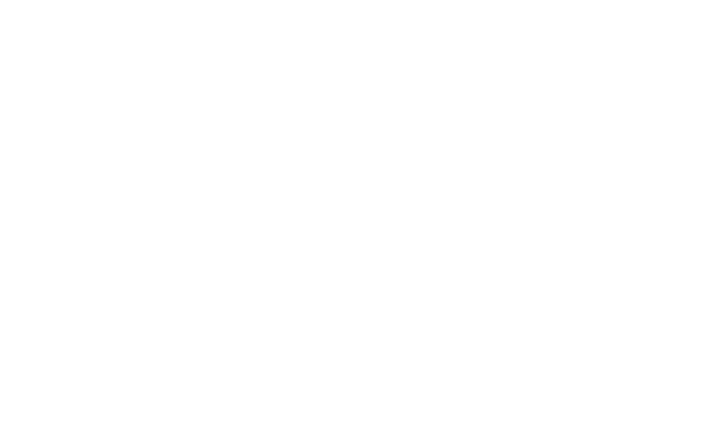

In [35]:
car_labeled = measure.label(car_closed)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")
# ax.imshow(car_gray, cmap="gray")

# getting the maximum width, height and minimum width and height that a license plate can be
plate_dimensions = (0.03*car_labeled.shape[0], 0.2*car_labeled.shape[0], 0.15*car_labeled.shape[1], 0.4*car_labeled.shape[1])
# plate_dimensions2 = (0.08*car_labeled.shape[0], 0.2*car_labeled.shape[0], 0.15*car_labeled.shape[1], 0.4*car_labeled.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions

for region in measure.regionprops(car_labeled):
    minr, minc, maxr, maxc = region.bbox
    w = maxc - minc
    h = maxr - minr
    
#     ratio = w/h
#     probably_text = False
#     wid,hei = car_blurred.shape
#     img_area = wid*hei
    
    region_area = region.area
    ratio = w / h
    
#     if region_area < 100 or ratio < 1 or w < 50 or h < 50:
#         continue
        
#     minr, minc, maxr, maxc = region.bbox
    
    if h >= min_height and h <= max_height and w >= min_width and w <= max_width and w > h:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='magenta', linewidth=2)
        ax.add_patch(rect)
        
plt.tight_layout()
plt.savefig('detected.png')
plt.show()